# **Machine Learning Project Using Pyspark**

#**Medical_Insurance_Cost_Prediction**

#**Business Problem in Medical_Insurance_Cost_Prediction**


** ***Business Problem in Medical_Insurance_Cost_Prediction *

The business problem in the machine learning project "Medical Insurance Cost Prediction" is to develop a predictive model that accurately estimates health insurance costs for individuals based on their demographic and health-related information. This model aims to assist insurance providers in pricing policies more accurately, enabling better financial planning and fairer premiums for policyholders, ultimately improving the efficiency and competitiveness of the insurance industry.**

**install pyspark**

In [ ]:
!pip install pyspark

#**Import PySpark Libraries:**

In [ ]:
# Import required libraries
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.feature import StringIndexer, VectorAssembler
from pyspark.ml import Pipeline
from pyspark.ml.regression import LinearRegression, GBTRegressor, RandomForestRegressor, DecisionTreeRegressor
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, sum


In [ ]:
# Create a Spark session
spark = SparkSession.builder.appName("InsurancePrediction").getOrCreate()

# **Load Data into a Spark DataFrame:**

In [ ]:
# Load the insurance dataset
insurance_df = spark.read.csv('/content/insurance.csv', header=True, inferSchema=True)

#**Exploratory Data Analysis (EDA):**

In [ ]:
# Display the first few rows of the dataset
insurance_df.show()

+---+------+------+--------+------+---------+-----------+
|age|   sex|   bmi|children|smoker|   region|    charges|
+---+------+------+--------+------+---------+-----------+
| 19|female|  27.9|       0|   yes|southwest|  16884.924|
| 18|  male| 33.77|       1|    no|southeast|  1725.5523|
| 28|  male|  33.0|       3|    no|southeast|   4449.462|
| 33|  male|22.705|       0|    no|northwest|21984.47061|
| 32|  male| 28.88|       0|    no|northwest|  3866.8552|
| 31|female| 25.74|       0|    no|southeast|  3756.6216|
| 46|female| 33.44|       1|    no|southeast|  8240.5896|
| 37|female| 27.74|       3|    no|northwest|  7281.5056|
| 37|  male| 29.83|       2|    no|northeast|  6406.4107|
| 60|female| 25.84|       0|    no|northwest|28923.13692|
| 25|  male| 26.22|       0|    no|northeast|  2721.3208|
| 62|female| 26.29|       0|   yes|southeast| 27808.7251|
| 23|  male|  34.4|       0|    no|southwest|   1826.843|
| 56|female| 39.82|       0|    no|southeast| 11090.7178|
| 27|  male| 4

In [ ]:
# Get the number of rows and columns in the dataset
num_rows = insurance_df.count()
num_columns = len(insurance_df.columns)
print("Number of Rows:", num_rows)
print("Number of Columns:", num_columns)

Number of Rows: 8028
Number of Columns: 7


In [ ]:

# Print the schema of the dataset
insurance_df.printSchema()

root
 |-- age: integer (nullable = true)
 |-- sex: string (nullable = true)
 |-- bmi: double (nullable = true)
 |-- children: integer (nullable = true)
 |-- smoker: string (nullable = true)
 |-- region: string (nullable = true)
 |-- charges: double (nullable = true)



In [ ]:

# Display summary statistics of the dataset
insurance_df.describe().show()

+-------+------------------+------+------------------+------------------+------+---------+------------------+
|summary|               age|   sex|               bmi|          children|smoker|   region|           charges|
+-------+------------------+------+------------------+------------------+------+---------+------------------+
|  count|              8028|  8028|              8028|              8028|  8028|     8028|              8028|
|   mean| 39.20702541106129|  NULL|30.663396860986463|   1.0949177877429|  NULL|     NULL|13270.422265141293|
| stddev|14.045583853433529|  NULL| 6.096287342461303|1.2051172319574042|  NULL|     NULL|12106.238999977639|
|    min|                18|female|             15.96|                 0|    no|northeast|         1121.8739|
|    max|                64|  male|             53.13|                 5|   yes|southwest|       63770.42801|
+-------+------------------+------+------------------+------------------+------+---------+------------------+



In [ ]:
# Check for missing values in the dataset
null_counts = insurance_df.select([sum(col(column).isNull().cast("int")).alias(column) for column in insurance_df.columns])
null_counts.show()

+---+---+---+--------+------+------+-------+
|age|sex|bmi|children|smoker|region|charges|
+---+---+---+--------+------+------+-------+
|  0|  0|  0|       0|     0|     0|      0|
+---+---+---+--------+------+------+-------+



#**visualisation**

**Plot the age distribution**

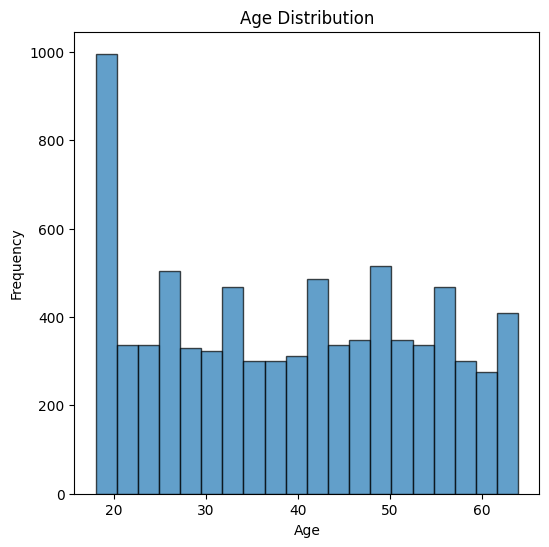

In [ ]:
# Plot the age distribution
age_data = insurance_df.select('age').rdd.flatMap(lambda x: x).collect()
plt.figure(figsize=(6, 6))
plt.hist(age_data, bins=20, edgecolor='k', alpha=0.7)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

**Plot the sex distribution**

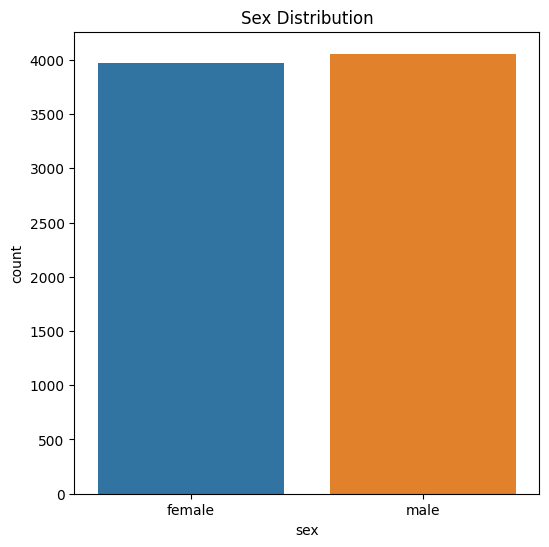

In [ ]:
# Plot the sex distribution
insurance_pandas = insurance_df.toPandas()
plt.figure(figsize=(6, 6))
sns.countplot(x='sex', data=insurance_pandas)
plt.title('Sex Distribution')
plt.show()

In [ ]:
# Show the count of each gender
sex_value_counts = insurance_df.groupBy("sex").count().orderBy("count", ascending=False)
sex_value_counts.show()

+------+-----+
|   sex|count|
+------+-----+
|  male| 4056|
|female| 3972|
+------+-----+



**Plot the BMI distribution**

<ipython-input-54-25347ce1f2cc>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(bmi_distribution['bmi'])


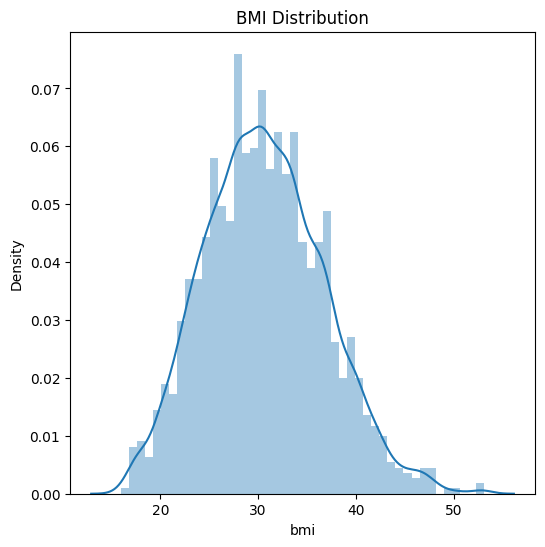

In [ ]:
# Plot the BMI distribution
bmi_distribution = insurance_df.select("bmi").toPandas()
plt.figure(figsize=(6, 6))
sns.distplot(bmi_distribution['bmi'])
plt.title('BMI Distribution')
plt.show()

**Plot the distribution of children**

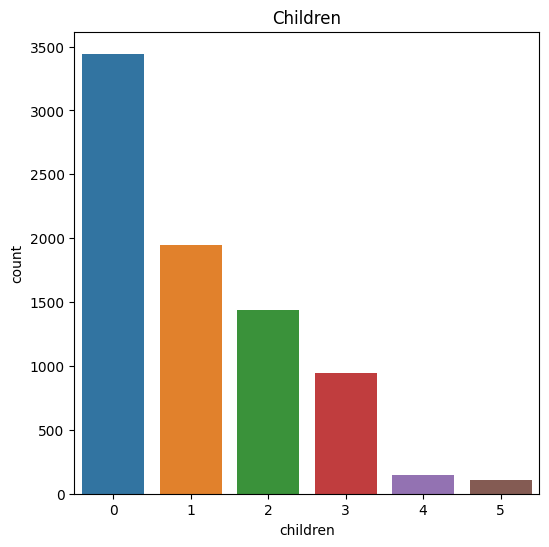

In [ ]:
# Plot the distribution of children
children_counts = insurance_df.groupBy("children").count().orderBy("children")
children_counts = children_counts.toPandas()
plt.figure(figsize=(6, 6))
sns.barplot(x="children", y="count", data=children_counts)
plt.title('Children')
plt.show()

In [ ]:
# Show the count of each value of children
children_value_counts = insurance_df.groupBy("children").count().orderBy("children")
children_value_counts.show()

+--------+-----+
|children|count|
+--------+-----+
|       0| 3444|
|       1| 1944|
|       2| 1440|
|       3|  942|
|       4|  150|
|       5|  108|
+--------+-----+



**Plot the smoker distribution**

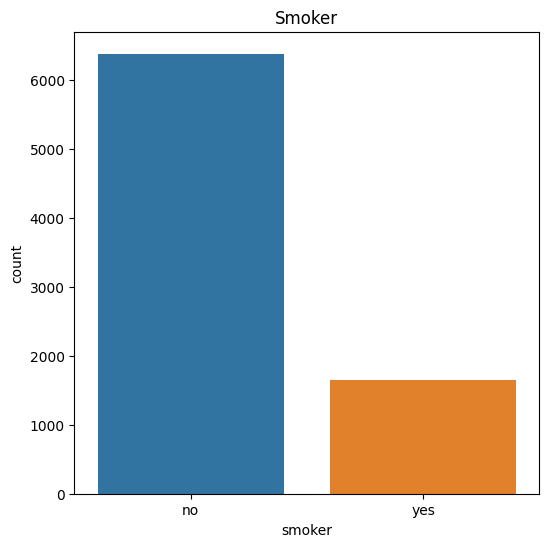

In [ ]:
# Plot the smoker distribution
smoker_counts = insurance_df.groupBy("smoker").count()
smoker_counts = smoker_counts.toPandas()
plt.figure(figsize=(6, 6))
sns.barplot(x="smoker", y="count", data=smoker_counts)
plt.title('Smoker')
plt.show()


In [ ]:
# Show the count of smokers and non-smokers
smoker_value_counts = insurance_df.groupBy("smoker").count()
smoker_value_counts.show()

+------+-----+
|smoker|count|
+------+-----+
|    no| 6384|
|   yes| 1644|
+------+-----+



**Plot the region distribution**

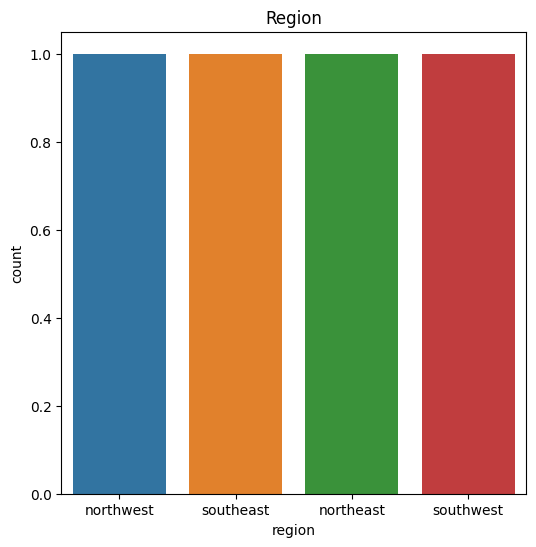

In [ ]:
# Plot the region distribution
region_counts = insurance_df.groupBy("region").count()
region_counts = region_counts.toPandas()
plt.figure(figsize=(6, 6))
sns.countplot(x="region", data=region_counts)
plt.title('Region')
plt.show()

In [ ]:
# Show the count of each region
region_value_counts = insurance_df.groupBy("region").count().orderBy("region")
region_value_counts.show()

+---------+-----+
|   region|count|
+---------+-----+
|northeast| 1944|
|northwest| 1950|
|southeast| 2184|
|southwest| 1950|
+---------+-----+



**Plot the charges distribution**

<ipython-input-61-c15f40d7f33c>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(charges_distribution['charges'])


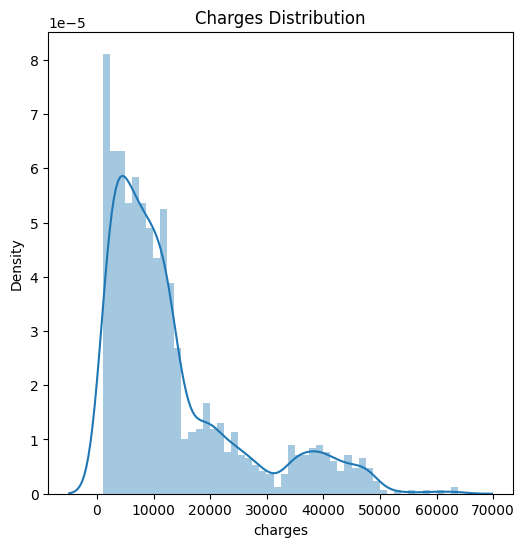

In [ ]:
# Plot the charges distribution
charges_distribution = insurance_df.select("charges").toPandas()
plt.figure(figsize=(6, 6))
sns.distplot(charges_distribution['charges'])
plt.title('Charges Distribution')
plt.show()


# **Data Pre-Processing**

In [ ]:
# Categorical columns to be indexed
categorical_columns = ["sex", "smoker", "region"]


In [ ]:
# Create indexers for categorical columns
indexers = [StringIndexer(inputCol=col, outputCol=col+"_index") for col in categorical_columns]

In [ ]:
# Create a pipeline to transform categorical columns
pipeline = Pipeline(stages=indexers)
indexed_data = pipeline.fit(insurance_df).transform(insurance_df)

In [ ]:
# Specify the feature columns for model training
feature_columns = ["age", "sex_index", "bmi", "children", "smoker_index", "region_index"]

In [ ]:
# Assemble feature vectors
assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")
feature_vector = assembler.transform(indexed_data)

In [ ]:
# Split the dataset into training and testing data
train_data, test_data = feature_vector.randomSplit([0.8, 0.2], seed=2)

In [ ]:

# Create a dictionary to store model results
model_results = {}

In [ ]:
# Define a function to evaluate and display model results
def evaluate_model(model, model_name):
    test_data_prediction = model.transform(test_data)

    evaluator = RegressionEvaluator(
        labelCol="charges",
        predictionCol="prediction",
        metricName="r2"  # You can change this to "mae", "mse", or "rmse" for other metrics
    )

    r2_test = evaluator.evaluate(test_data_prediction)
    mae = evaluator.setMetricName("mae").evaluate(test_data_prediction)
    mse = evaluator.setMetricName("mse").evaluate(test_data_prediction)
    rmse = evaluator.setMetricName("rmse").evaluate(test_data_prediction)

    print(f"{model_name}:")
    print("R-squared:", r2_test)
    print("Mean Absolute Error (MAE):", mae)
    print("Mean Squared Error (MSE):", mse)
    print("Root Mean Squared Error (RMSE):", rmse)
    print("-" * 50)

    # Store results in the dictionary
    model_results[model_name] = {
        "R-squared": r2_test,
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse
    }

# **Linear Regression**

Linear Regression:
R-squared: 0.7620588541115838
Mean Absolute Error (MAE): 4150.54656664766
Mean Squared Error (MSE): 35063651.51958022
Root Mean Squared Error (RMSE): 5921.456874754745
--------------------------------------------------


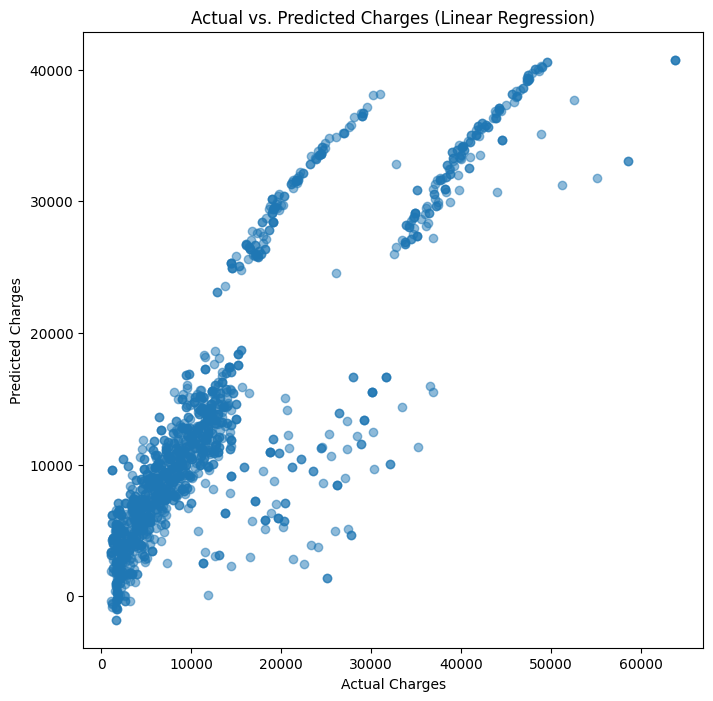

In [ ]:
# Linear Regression
regressor = LinearRegression(featuresCol="features", labelCol="charges")
model = regressor.fit(train_data)
evaluate_model(model, "Linear Regression")

# Scatter plot for Linear Regression
predictions = model.transform(test_data)
actual_values = predictions.select("charges").rdd.map(lambda x: x[0]).collect()
predicted_values = predictions.select("prediction").rdd.map(lambda x: x[0]).collect()

plt.figure(figsize=(8, 8))
plt.scatter(actual_values, predicted_values, alpha=0.5)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs. Predicted Charges (Linear Regression)")
plt.show()

#**Ridge Regression***

Ridge Regression:
R-squared: 0.7620585511992961
Mean Absolute Error (MAE): 4150.561752775895
Mean Squared Error (MSE): 35063696.157555126
Root Mean Squared Error (RMSE): 5921.460643925207
--------------------------------------------------


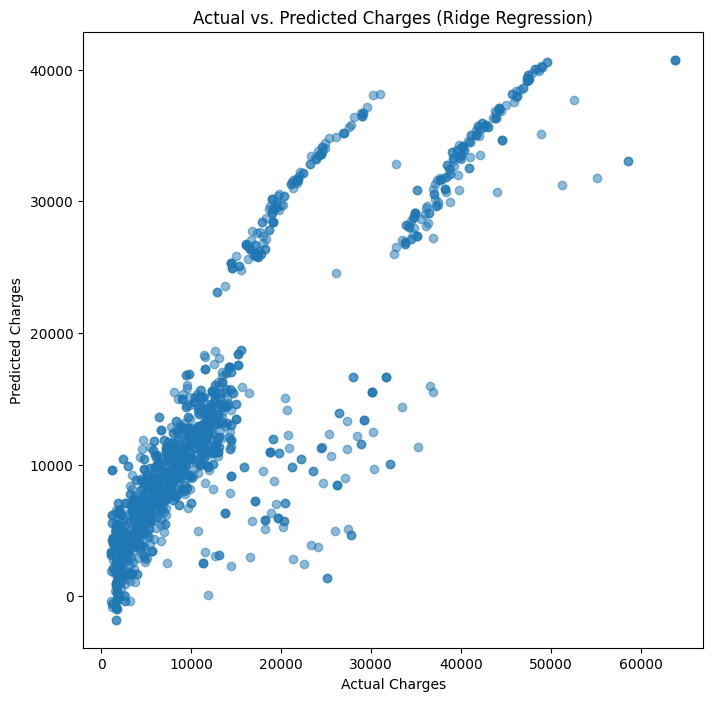

In [ ]:
# Ridge Regression
ridge_regressor = LinearRegression(featuresCol="features", labelCol="charges", elasticNetParam=0.0, regParam=0.1)
ridge_model = ridge_regressor.fit(train_data)
evaluate_model(ridge_model, "Ridge Regression")

plt.figure(figsize=(8, 8))
plt.scatter(ridge_actual_values, ridge_predicted_values, alpha=0.5)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs. Predicted Charges (Ridge Regression)")
plt.show()

# **Lasso Regression**

In [ ]:
# Lasso Regression
lasso_regressor = LinearRegression(featuresCol="features", labelCol="charges", elasticNetParam=1.0, regParam=0.1)
lasso_model = lasso_regressor.fit(train_data)
evaluate_model(lasso_model, "Lasso Regression")

Lasso Regression:
R-squared: 0.7620584585118433
Mean Absolute Error (MAE): 4150.546905754404
Mean Squared Error (MSE): 35063709.816229135
Root Mean Squared Error (RMSE): 5921.4617972447595
--------------------------------------------------


#**Gradient Boosting Regression**

In [ ]:
# Gradient Boosting Regression
gbt_regressor = GBTRegressor(featuresCol="features", labelCol="charges", maxIter=10)
gbt_model = gbt_regressor.fit(train_data)
evaluate_model(gbt_model, "Gradient Boosting Regression")

Gradient Boosting Regression:
R-squared: 0.8953525472746108
Mean Absolute Error (MAE): 2185.580942452977
Mean Squared Error (MSE): 15421131.98234131
Root Mean Squared Error (RMSE): 3926.9749149111344
--------------------------------------------------


#**Random Forest Regression**

In [ ]:
# Random Forest Regression
rf_regressor = RandomForestRegressor(featuresCol="features", labelCol="charges", numTrees=100)
rf_model = rf_regressor.fit(train_data)
evaluate_model(rf_model, "Random Forest Regression")

Random Forest Regression:
R-squared: 0.8385204139598301
Mean Absolute Error (MAE): 3371.9874012772725
Mean Squared Error (MSE): 23796069.0291617
Root Mean Squared Error (RMSE): 4878.121465191462
--------------------------------------------------


# **Decision Tree Regression**

In [ ]:
# Decision Tree Regression
dt_regressor = DecisionTreeRegressor(featuresCol="features", labelCol="charges")
dt_model = dt_regressor.fit(train_data)
evaluate_model(dt_model, "Decision Tree Regression")

Decision Tree Regression:
R-squared: 0.8781759835785026
Mean Absolute Error (MAE): 2371.0299248755896
Mean Squared Error (MSE): 17952316.916731134
Root Mean Squared Error (RMSE): 4237.017455325283
--------------------------------------------------


#**Thank You**